In [1]:
%matplotlib n
from forschungspraktikum.jiles_atherton.functions import get_gradient, jiles_atherton_H, get_cost
from scipy.optimize import minimize
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

In [21]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.001
a = 110.5
k = 30.0
c = 0.4
Msat = 1.35e5

params = [alpha, a, Msat, k, c]

# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 15.0 # A, Strom
f = 1000.0 # Hz, Frequenz
n = 3 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode


In [22]:
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.cos(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

In [46]:
p_test = [alpha*2, a-10, Msat-1.0e5, k, c+0.5]

M_test = np.array(jiles_atherton_H(H, t, p_test)) + 10*np.random.normal(0.0, 100.0, int(t.size/2))

In [47]:
def function_to_optimize(x):
    return get_cost(H, t, M_test, x)

def grad(x):
    return np.array(get_gradient(H, t, M_test, x))

def callback(x):
    pass#print(x)

res = minimize(function_to_optimize, params, 
               method='TNC', options={'maxiter': 10000, 'disp': True}, 
               callback=callback,
               jac=grad,
               tol=1.0e-6,
               bounds = [(0, None), (0, None), (0, None), (0, None), (0, None)]
              )


In [48]:
print(res)

     fun: 249827.69052264307
     jac: array([-5.91610038e+02, -1.54725406e-01, -1.09970046e-04, -4.11008352e-02,
       -8.04824547e+00])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 744
     nit: 215
  status: 1
 success: True
       x: array([9.32174836e-04, 8.04360799e+01, 3.24271630e+04, 3.64559824e+01,
       9.09622365e-01])


In [49]:
M = jiles_atherton_H(H, t, p_test)
M_ = jiles_atherton_H(H, t, res.x)
M_i = jiles_atherton_H(H, t, params)

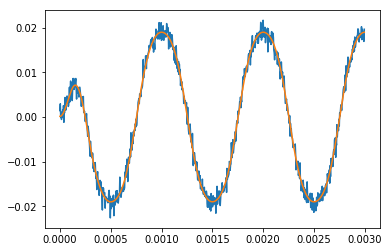

In [50]:
plt.plot(t[::2], (np.array(M_test) + H[::2])*mu_0)
plt.plot(t[::2], (np.array(M_) + H[::2])*mu_0)
#plt.plot(t[::2], M_i)
plt.show()

In [55]:
res_ = np.array(res.x)
p_test_ = np.array(p_test)
print(res_, p_test)
print(np.abs((1 - res_/p_test_)))

[9.32174836e-04 8.04360799e+01 3.24271630e+04 3.64559824e+01
 9.09622365e-01] [0.002, 100.5, 35000.0, 30.0, 0.9]
[0.53391258 0.199641   0.07350963 0.21519941 0.01069152]


In [60]:
np.savetxt("test_data.txt", np.array([t[::2], 100.0*np.array(M)]).T)
np.savetxt("result.txt", np.array([t[::2], 100.0*np.array(M_)]).T)